## 讀取資料

In [1]:
import pandas
df = pandas.read_csv('data/20211109_top150_tw_stocks.csv')
df.set_index('Date', inplace=True)
df.head()

/Users/david/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,High,Low,Open,Close,Volume,Adj Close,symbol
Date,,,,,,,
2021-01-04,43.500000,43.049999,43.200001,43.200001,13705760.0,40.352589,1101
2021-01-05,43.400002,43.000000,43.250000,43.099998,16601334.0,40.259178,1101
2021-01-06,43.299999,42.799999,43.099998,42.950001,18966159.0,40.119068,1101
2021-01-07,43.150002,42.849998,42.950001,42.849998,21021508.0,40.025658,1101
2021-01-08,43.000000,42.799999,42.900002,42.950001,17371239.0,40.119068,1101


## 建立環境

In [2]:
from environment import ETFEnvironment
from agent import AutoencoderAgent
from utils import *

/Volumes/Macintosh HD - Data/Users/davidchiu/project/Deep-Portfolio-Management/utils.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  current_cmap.set_bad(color='red')


In [3]:
N_ASSETS = 138 # 138 隻股票
WINDOW_FIT = 20 # 20 天週期
WINDOW_HOLD = 20 # 20 天週期
env = ETFEnvironment()

## Autoencoder 方法

In [4]:
agent_ae = AutoencoderAgent(N_ASSETS, allow_short=True, encoding_dim = 5)

In [15]:
actions_equal, actions_ae = [], []
result_equal, result_ae = [], []

for i in range(WINDOW_FIT, len(env.data), WINDOW_HOLD):
    
    state = env.get_state(i, WINDOW_FIT, is_cov_matrix=False, is_raw_time_series=True)
    
    action_equal = np.ones(N_ASSETS) / N_ASSETS
    action_ae = agent_ae.act(state)

    state_action = env.get_state(i+WINDOW_HOLD, WINDOW_HOLD, is_cov_matrix=False)
    
    r = np.dot(state_action, action_equal)
    result_equal.append(r.tolist())
    actions_equal.append(action_equal)
    
    r = np.dot(state_action, action_ae)
    result_ae.append(r.tolist())
    actions_ae.append(action_ae)

In [16]:
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_ae_vis = [item for sublist in result_ae for item in sublist]

In [17]:
results = pandas.DataFrame({'result_equal_vis':result_equal_vis, 
                  'result_ae_vis': result_ae_vis})
results.head()

,result_equal_vis,result_ae_vis
0,0.001805,0.003159
1,-0.002488,-0.006941
2,0.004718,0.006047
3,0.021762,0.028141
4,0.008143,0.008267


## 匯出運算結果

In [18]:
results.to_csv('data/ae_result.csv')

## 評估資產配置效果

In [19]:
import pandas
df = pandas.read_csv('data/ae_result.csv', index_col = 0)
df.head()

,result_equal_vis,result_ae_vis
0,0.001805,0.003159
1,-0.002488,-0.006941
2,0.004718,0.006047
3,0.021762,0.028141
4,0.008143,0.008267


<AxesSubplot:>

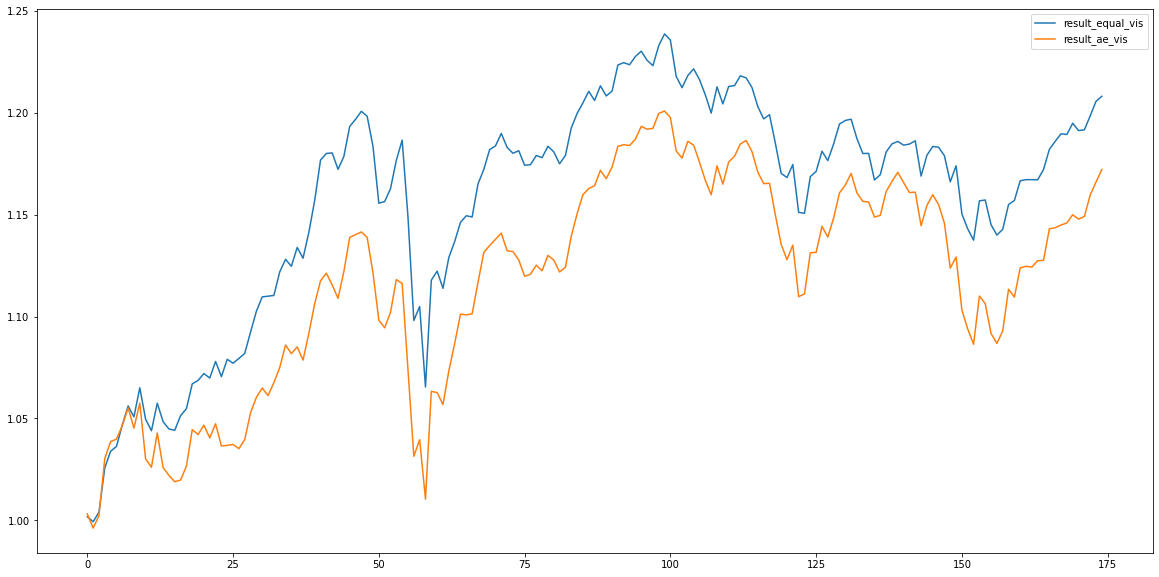

In [20]:
(df.cumsum() + 1).plot(kind = 'line', figsize = [20,10])